In [ ]:
from google.colab import files

# Upload a CSV file
uploaded = files.upload()

# Display the names of the uploaded files
for file_name in uploaded.keys():
    print(f"Uploaded file: {file_name}")


Saving Assignment.xlsx to Assignment.xlsx
Uploaded file: Assignment.xlsx


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load datasets
user_details = pd.read_excel('Assignment.xlsx', sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel('Assignment.xlsx', sheet_name='CookingSessions.csv')
order_details = pd.read_excel('Assignment.xlsx', sheet_name='OrderDetails.csv')


In [ ]:
user_details.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9


In [ ]:
cooking_sessions.head()

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7


In [ ]:
order_details.head()

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005


In [ ]:
# Step 1: Data Cleaning
# Handle missing values by imputing 'Rating' in OrderDetails with the mean
order_details['Rating'].fillna(order_details['Rating'].mean(), inplace=True)

<ipython-input-20-1161ee0f9229>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_details['Rating'].fillna(order_details['Rating'].mean(), inplace=True)


In [ ]:
# Convert date columns to datetime format for consistency
user_details['Registration Date'] = pd.to_datetime(user_details['Registration Date'])
cooking_sessions['Session Start'] = pd.to_datetime(cooking_sessions['Session Start'])
cooking_sessions['Session End'] = pd.to_datetime(cooking_sessions['Session End'])
order_details['Order Date'] = pd.to_datetime(order_details['Order Date'])

In [ ]:
# Step 2: Merge Datasets
# Merge UserDetails with CookingSessions on 'User ID'
merged_data_1 = pd.merge(cooking_sessions, user_details, on='User ID', how='left')

In [ ]:
# Merge the result with OrderDetails on 'Session ID' and 'User ID'
final_data = pd.merge(merged_data_1, order_details, on=['Session ID', 'User ID'], how='left')


In [ ]:
# Step 3: Analysis
# Popular Dishes by Order Count
popular_dishes = final_data['Dish Name_x'].value_counts().head(10)

In [ ]:
popular_dishes

,count
Dish Name_x,
Spaghetti,4
Grilled Chicken,4
Caesar Salad,3
Pancakes,2
Veggie Burger,2
Oatmeal,1


In [ ]:
# Relationship between cooking sessions and orders (correlation of session ratings and order ratings)
correlation = final_data[['Session Rating', 'Rating']].corr()

In [ ]:
correlation

,Session Rating,Rating
Session Rating,1.00000,0.61151
Rating,0.61151,1.00000


In [ ]:
# Impact of demographics (e.g., location, age) on total orders
demographic_analysis = final_data.groupby('Location')['Total Orders'].sum().sort_values(ascending=False)


In [ ]:
demographic_analysis

,Total Orders
Location,
Chicago,45
New York,36
Los Angeles,24
San Francisco,20
Seattle,18
Boston,14
Austin,7
Miami,5


In [ ]:
# Age Group Analysis: Group users into age brackets
bins = [18, 25, 35, 50, 65]
labels = ['18-25', '26-35', '36-50', '51-65']
user_details['Age Group'] = pd.cut(user_details['Age'], bins=bins, labels=labels, right=False)
age_analysis = user_details.groupby('Age Group')['Total Orders'].sum()

<ipython-input-30-b4c72047332e>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_analysis = user_details.groupby('Age Group')['Total Orders'].sum()


In [ ]:
age_analysis

,Total Orders
Age Group,
18-25,0
26-35,57
36-50,37
51-65,0


In [ ]:
# Step 1: Peak Ordering Times
# Step 1: Peak Ordering Times
# Create a mapping of time categories to numerical hours for analysis
time_mapping = {'Morning': 8, 'Afternoon': 14, 'Evening': 19, 'Night': 22}
# Assuming general time ranges for categories

# Map the 'Time of Day' column to numerical hours
order_details['Time of Day'] = order_details['Time of Day'].map(time_mapping)

# Calculate peak order times based on numerical hours
peak_order_times = order_details['Time of Day'].value_counts().sort_index()

In [ ]:
peak_order_times

,count
Time of Day,
8.0,3
22.0,8


In [ ]:
#Repeat Orders Analysis
repeat_orders = final_data['User ID'].value_counts()
top_repeat_users = repeat_orders[repeat_orders >= 3]  # Users with greater than or equal to 3 orders
top_repeat_users

,count
User ID,
U001,3
U002,3
U003,3


<ipython-input-32-917fc7642dca>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_dishes.values, y=popular_dishes.index, palette='viridis')


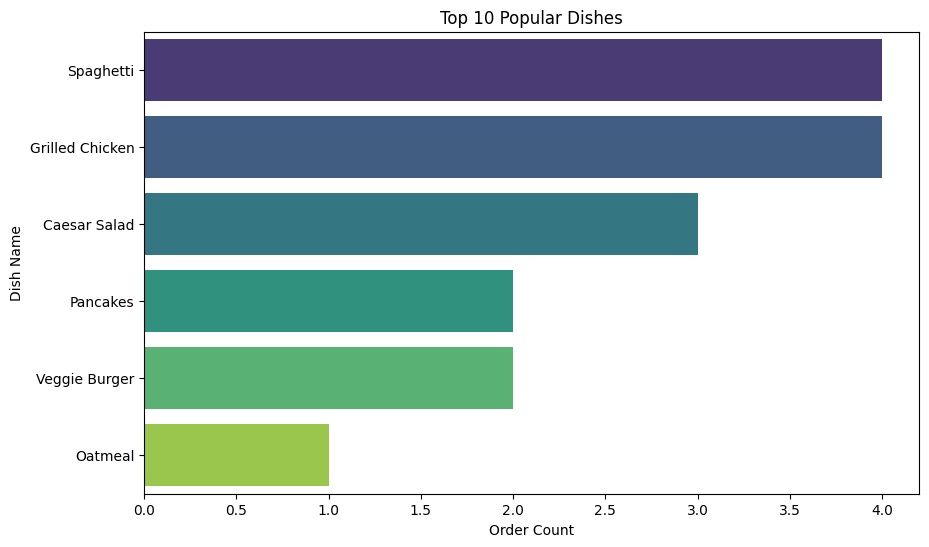

In [ ]:
# Step 4: Visualization
# Visualization 1: Popular Dishes
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_dishes.values, y=popular_dishes.index, palette='viridis')
plt.title('Top 10 Popular Dishes')
plt.xlabel('Order Count')
plt.ylabel('Dish Name')
plt.show()

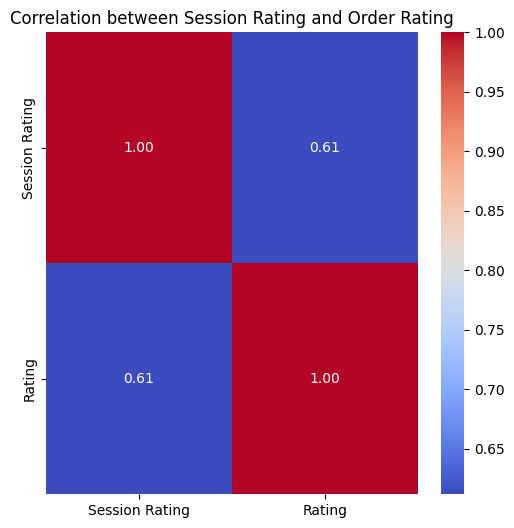

In [ ]:
# Visualization 2: Correlation between session rating and order rating
plt.figure(figsize=(6, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Session Rating and Order Rating')
plt.show()

<ipython-input-34-7f9f5880bf80>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=demographic_analysis.values, y=demographic_analysis.index, palette='rocket')


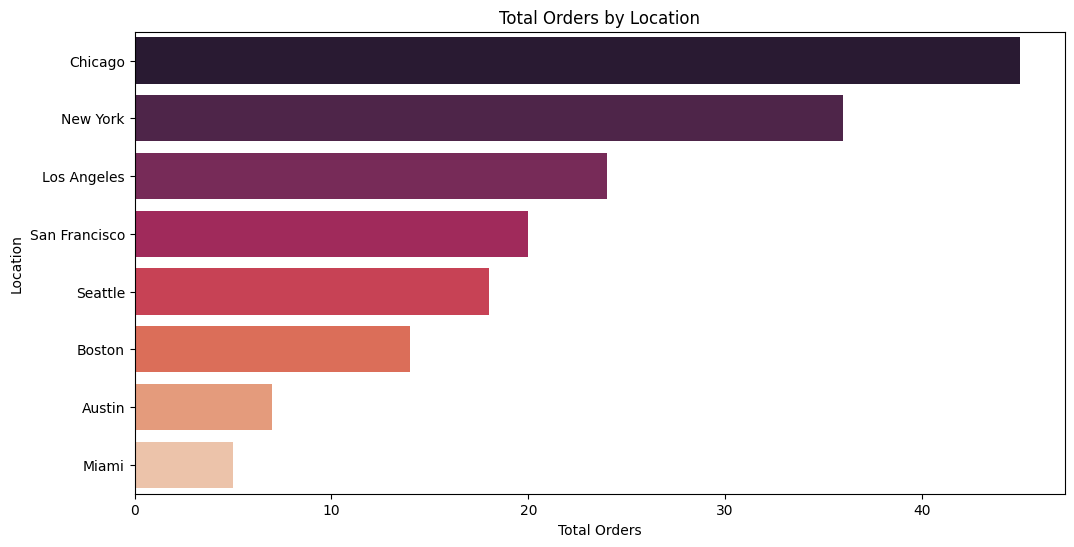

In [ ]:
# Visualization 3: Orders by Location
plt.figure(figsize=(12, 6))
sns.barplot(x=demographic_analysis.values, y=demographic_analysis.index, palette='rocket')
plt.title('Total Orders by Location')
plt.xlabel('Total Orders')
plt.ylabel('Location')
plt.show()

<ipython-input-35-488332f11e45>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_analysis.index, y=age_analysis.values, palette='mako')


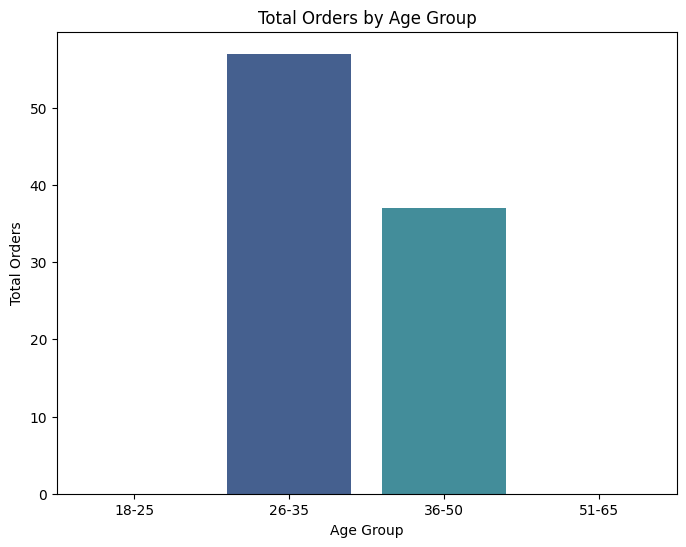

In [ ]:
# Visualization 4: Orders by Age Group
plt.figure(figsize=(8, 6))
sns.barplot(x=age_analysis.index, y=age_analysis.values, palette='mako')
plt.title('Total Orders by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Orders')
plt.show()

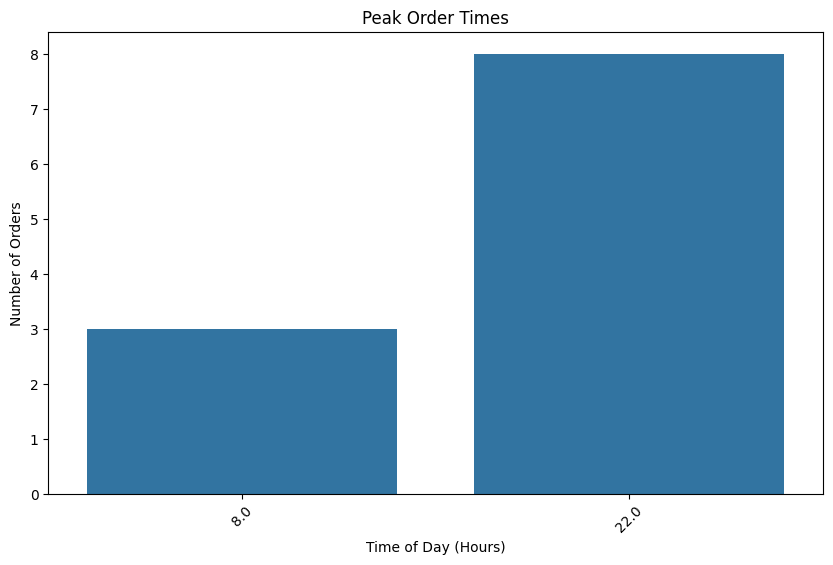

In [ ]:
# Visualization 5: # Create a bar plot to visualize peak order times
plt.figure(figsize=(10, 6))
sns.barplot(x=peak_order_times.index, y=peak_order_times.values)
plt.xlabel('Time of Day (Hours)')
plt.ylabel('Number of Orders')
plt.title('Peak Order Times')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

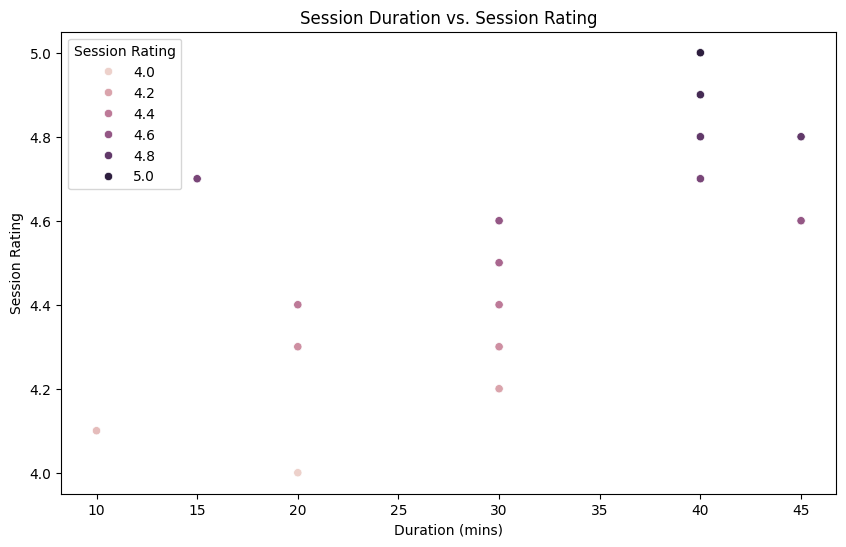

In [ ]:
# Visualization 6:  Session Duration vs. Session Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_data, x='Duration (mins)', y='Session Rating', hue='Session Rating')
plt.title('Session Duration vs. Session Rating')
plt.xlabel('Duration (mins)')
plt.ylabel('Session Rating')
plt.show()

<ipython-input-68-22cbbc603775>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_repeat_users.index, y=top_repeat_users.values, palette='magma')


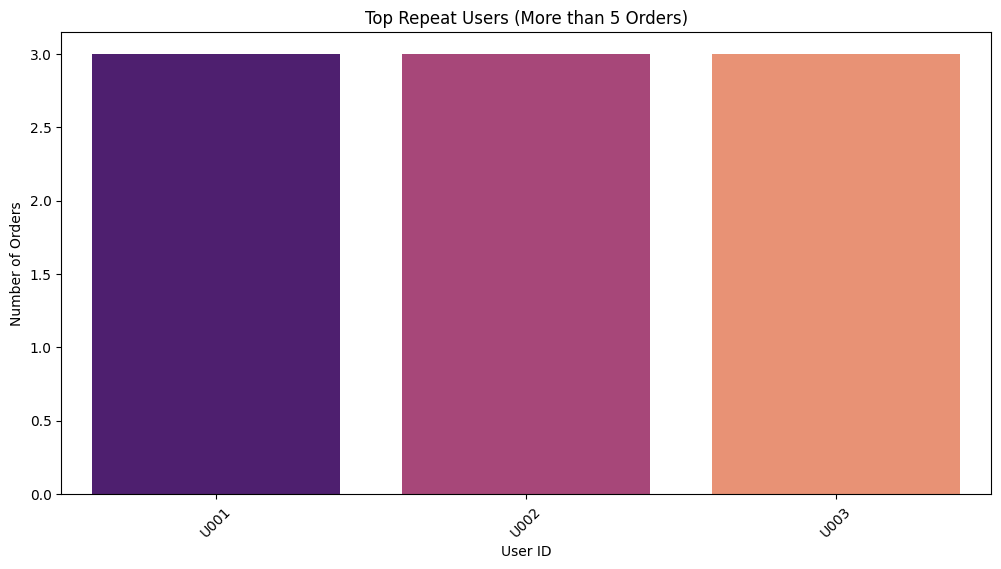

In [ ]:
# Visualization 7: Top Repeat Users
plt.figure(figsize=(12, 6))
sns.barplot(x=top_repeat_users.index, y=top_repeat_users.values, palette='magma')
plt.title('Top Repeat Users (More than 5 Orders)')
plt.xlabel('User ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()